### ***Assignment 1: Pixel Classification & Grey Level Thresholding***
● Write a Python function that classifies pixels in a grayscale image into two classes based on a given threshold.

● Implement global thresholding using a fixed threshold.

● Implement local thresholding using a window-based approach.

● Compare the results of global and local thresholding.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 699.5, 399.5, -0.5)

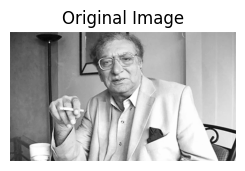

In [16]:
# Load the image in grayscale
image_path = '/content/faraaz.webp'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

In [7]:
def global_thresholding(image, threshold):
    """Classify pixels using global thresholding."""
    # Create a binary image based on the threshold
    binary_image = np.where(image >= threshold, 255, 0).astype(np.uint8)
    return binary_image

In [8]:
def local_thresholding(image, window_size):
    """Classify pixels using local thresholding."""
    # Create an empty binary image
    binary_image = np.zeros(image.shape, dtype=np.uint8)

    # Pad the image to handle borders
    padded_image = cv2.copyMakeBorder(image, window_size//2, window_size//2, window_size//2, window_size//2, cv2.BORDER_REFLECT)

    # Iterate through each pixel in the original image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the local window
            local_window = padded_image[i:i + window_size, j:j + window_size]
            # Calculate the local threshold (mean in this case)
            local_threshold = np.mean(local_window)
            # Classify the pixel based on the local threshold
            binary_image[i, j] = 255 if image[i, j] >= local_threshold else 0

    return binary_image

In [9]:
# Global thresholding
global_threshold = 128  # You can adjust this threshold
binary_global = global_thresholding(image, global_threshold)

In [10]:
# Local thresholding
window_size = 15  # Size of the local window (must be odd)
binary_local = local_thresholding(image, window_size)

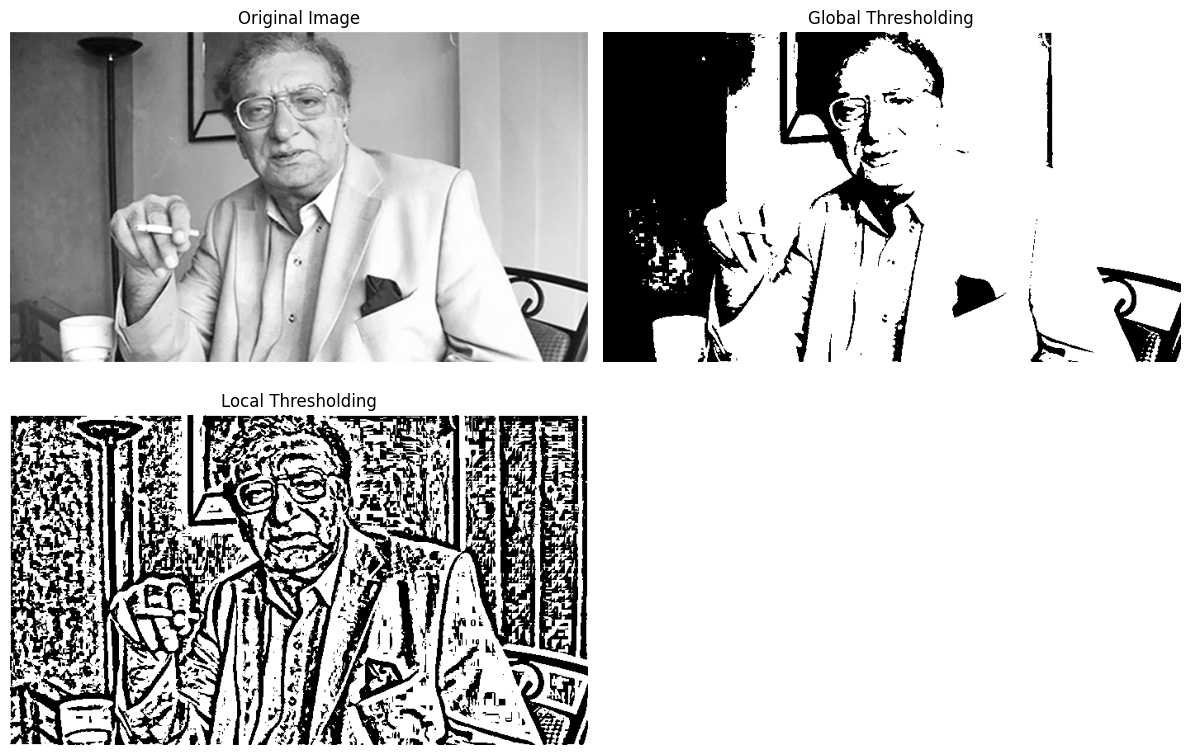

In [11]:
# Visualize the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Thresholding')
plt.imshow(binary_global, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Local Thresholding')
plt.imshow(binary_local, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Assignment 2: Optimum Thresholding - Bayes Analysis**
● Generate a synthetic bimodal histogram representing two classes.

● Implement Bayes thresholding based on the histogram.

● Apply the threshold to segment the image

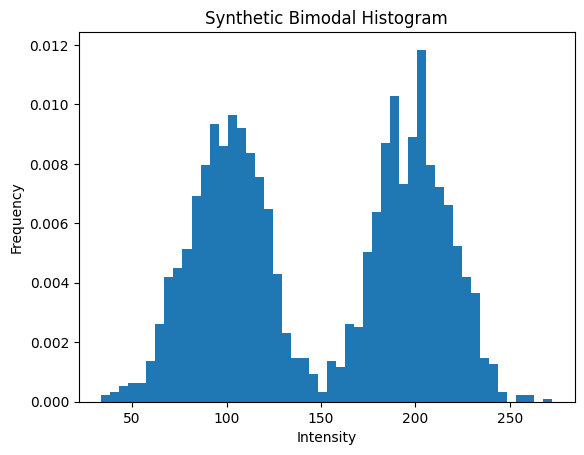

In [18]:
class1 = np.random.normal(100, 20, 1000)  # Class 1: mean 100, std dev 20, 1000 samples
class2 = np.random.normal(200, 20, 1000)  # Class 2: mean 200, std dev 20, 1000 samples
histogram = np.concatenate((class1, class2))  # Combine the two classes

# Plot the histogram
plt.hist(histogram, bins=50, density=True)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Synthetic Bimodal Histogram')
plt.show()

In [19]:
def bayes_thresholding(histogram):
    # Calculate the probability density function (PDF) of each class
    pdf1 = np.exp(-((histogram - 100) / 20) ** 2) / (20 * np.sqrt(2 * np.pi))
    pdf2 = np.exp(-((histogram - 200) / 20) ** 2) / (20 * np.sqrt(2 * np.pi))

    # Calculate the posterior probabilities
    posterior1 = pdf1 / (pdf1 + pdf2)
    posterior2 = pdf2 / (pdf1 + pdf2)

    # Find the threshold where the posterior probabilities are equal
    threshold = histogram[np.argmin(np.abs(posterior1 - posterior2))]

    return threshold

# Calculate the Bayes threshold
bayes_threshold = bayes_thresholding(histogram)
print("Bayes Threshold:", bayes_threshold)

Bayes Threshold: 150.4134412111169


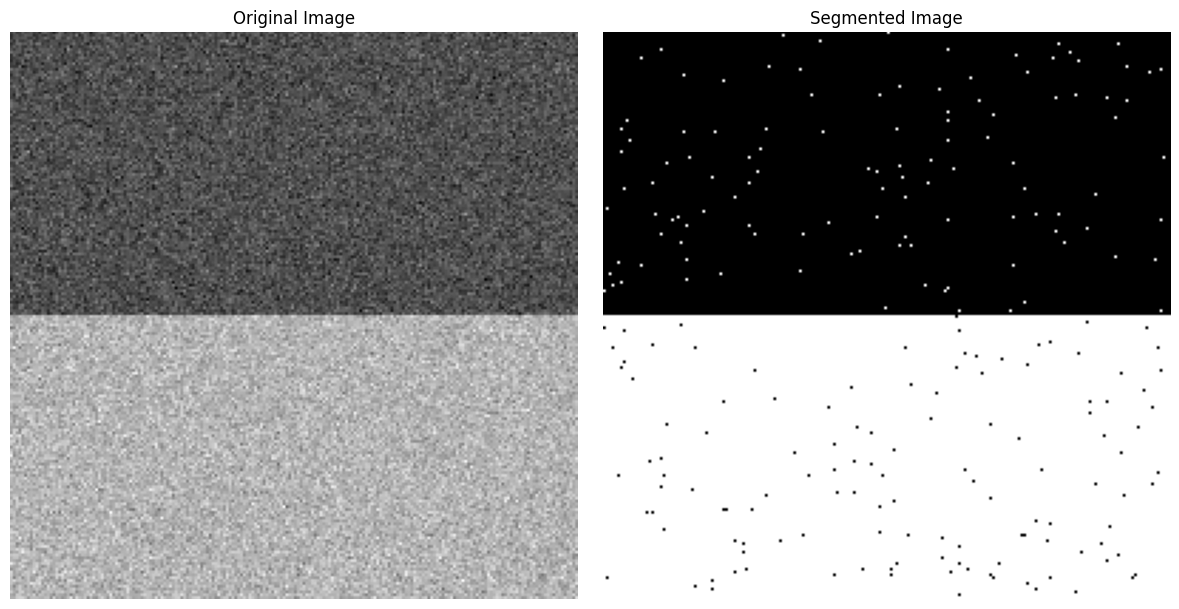

In [20]:
# Generate a synthetic image with two classes
image = np.random.normal(100, 20, (200, 200))  # Class 1
image[100:, :] = np.random.normal(200, 20, (100, 200))  # Class 2

# Apply the Bayes threshold to segment the image
binary_image = np.where(image >= bayes_threshold, 255, 0).astype(np.uint8)

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Assignment 3: Otsu Method**
● Implement the Otsu method to find the optimal threshold.

● Apply the threshold to segment the image.

● Visualize the results.

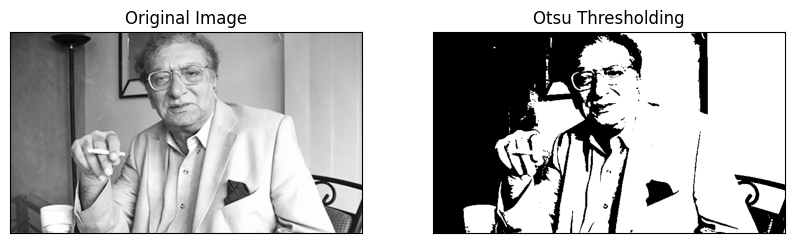

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/faraaz.webp' , cv2.IMREAD_GRAYSCALE)

# Apply Otsu thresholding
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(thresh, cmap='gray')
plt.title('Otsu Thresholding'), plt.xticks([]), plt.yticks([])

plt.show()